# Finding Alpha and Beta in Capital Asset Pricing Model

In [495]:
#Mushfiqur Rahman [Mushfiq] 
#Modeling CAPM as a simple linear regression
#import

In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [497]:
import pandas_datareader
import datetime

In [498]:
import pandas_datareader.data as web

In [499]:
#get closing value of Tesla, AMaZoN and SPX

In [500]:
start = datetime.datetime(2012, 1, 3)
end = datetime.date.today()

In [501]:
tsla_raw = web.DataReader("TSLA", 'morningstar', start, end)
tsla = tsla_raw.loc['TSLA']

In [502]:
amzn_raw = web.DataReader("AMZN", 'morningstar', start, end)
amzn = amzn_raw.loc['AMZN']

In [503]:
spx_raw = web.DataReader("SPX", 'morningstar', start, end)
spx = spx_raw.loc['SPX']

In [504]:
amzn.head()

,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,179.03,179.475,175.550,176.35,5111970
2012-01-04,177.51,180.500,176.065,179.21,4206624
2012-01-05,177.61,178.250,174.050,175.94,3810496
2012-01-06,182.61,184.650,177.500,178.07,7010139
2012-01-09,178.56,184.370,177.000,182.76,5058542


In [505]:
from scipy import stats

In [506]:
import matplotlib.pyplot as plt
%matplotlib inline

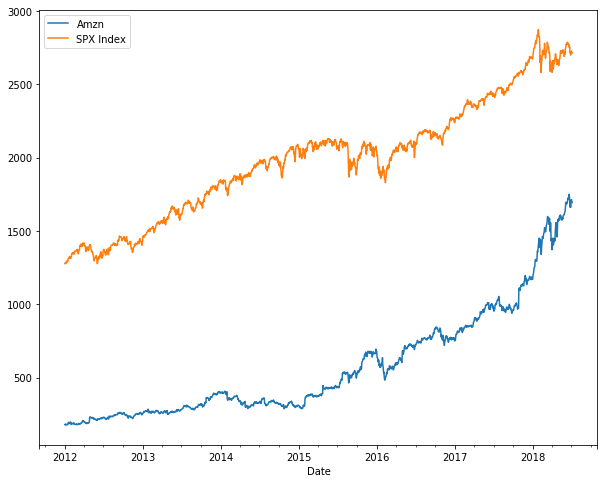

In [507]:
#tsla.plot(label='tsla',figsize=(10,8))
amzn['Close'].plot(label='Amzn',figsize=(10,8))
spx['Close'].plot(label='SPX Index')
plt.legend()

## Compare cumulative return 

In [508]:
import warnings
warnings.filterwarnings('ignore')

amzn['Cumulative'] = amzn['Close']/amzn['Close'].iloc[0]
spx['Cumulative'] = spx['Close']/spx['Close'].iloc[0]

Text(0.5,1,'Cumulative Return')

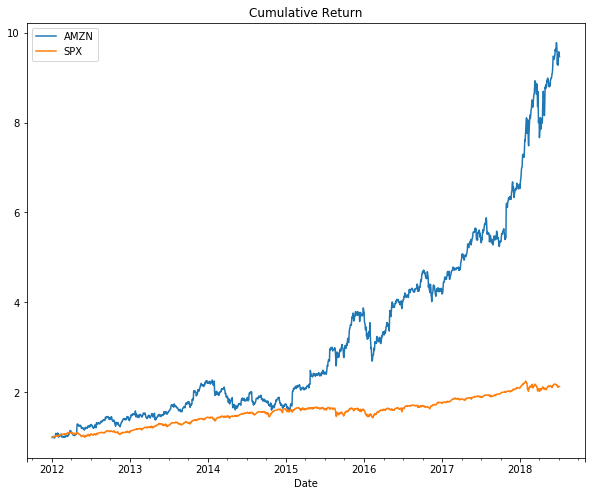

In [509]:
amzn['Cumulative'].plot(label='AMZN',figsize=(10,8))
spx['Cumulative'].plot(label='SPX')
plt.legend()
plt.title('Cumulative Return')

## Calculate Daily return

In [510]:
amzn['Daily Return'] = amzn['Close'].pct_change(1)
spx['Daily Return'] = spx['Close'].pct_change(1)

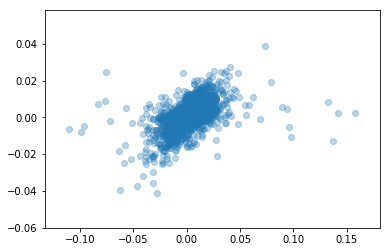

In [511]:
plt.scatter(amzn['Daily Return'],spx['Daily Return'],alpha=0.3)

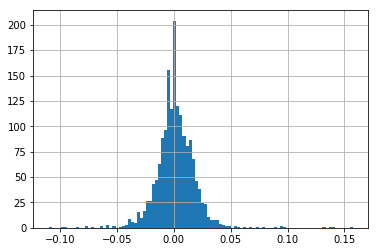

In [512]:
amzn['Daily Return'].hist(bins=100)

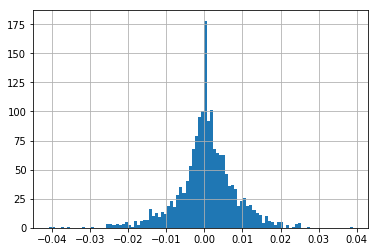

In [513]:
spx['Daily Return'].hist(bins=100)

In [514]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spx['Daily Return'].iloc[1:], amzn['Daily Return'].iloc[1:])

In [515]:
beta

1.1901929859640843

In [516]:
alpha

0.0009257693821188513

In [517]:
#using statsmodel 
import statsmodels.api as sm


In [518]:
X = spx['Daily Return'].iloc[1:]
y = amzn['Daily Return'].iloc[1:]

In [519]:
# Add a constant to the independent value
X1 = sm.add_constant(X)


In [520]:
# make regression model 
model = sm.OLS(y, X1)

In [521]:
# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Daily Return   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     570.7
Date:                Thu, 05 Jul 2018   Prob (F-statistic):          6.15e-109
Time:                        04:29:24   Log-Likelihood:                 4634.6
No. Observations:                1696   AIC:                            -9265.
Df Residuals:                    1694   BIC:                            -9254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0009      0.000      2.416   